## Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the file
path = '/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/adni_label_wind.csv'
data_ori = pd.read_csv(path)

In [ ]:
data_ori.head()

,Unnamed: 0,Unnamed..0,level_0,index,RID,COLPROT,ORIGPROT,EXAMDATE,EXAMDATE_bl,Years_bl,Month_bl,Month,DX,DX_bl,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_Female,PTGENDER_Male,PTETHCAT_Not.Hisp.Latino,PTETHCAT_Hisp.Latino,PTETHCAT_Unknown,PTRACCAT_White,PTRACCAT_Am.Indian.Alaskan,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian.Other.PI,PTRACCAT_More.than.one,PTRACCAT_Unknown,PTMARRY_Never.married,PTMARRY_Married,PTMARRY_Widowed,PTMARRY_Divorced,PTMARRY_Unknown,m0_label,m3_label,m6_label,m12_label,m18_label,m24_label,m30_label,m36_label,m48_label,tran_1to2_m3,tran_1to2_m6,tran_1to2_m12,tran_1to2_m18,tran_1to2_m24,tran_1to2_m30,tran_1to2_m36,tran_1to2_m48,tran_1to2_m6to12,tran_1to2_m12to24,m6_ind,m12_ind
0,1,1,31,15,6,2,2,2005-11-29,2005-11-29,0,0,0,1,1,685.5,187.1,17.34,80.4,13,0,30,1,5,83.3333,25,168.0,-10.30390,-11.07530,0,0.5,18.67,25.67,7,39826.0,5348.0,927510.0,2277.0,17963.0,17802.0,1485830.0,1.04187,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,1,1.0,1,1.0,1.0,NaN,NaN,0,0,0.0,0,0.0,0.0,NaN,0,0,1,1
1,2,2,129,5153,30,2,2,2005-10-20,2005-10-20,0,0,0,1,1,333.5,340.8,36.23,80.0,19,0,36,6,10,90.9091,29,139.0,-8.37740,-8.69927,6,1.0,10.00,22.00,10,22274.0,7509.0,1040250.0,4562.0,18093.0,18596.0,1588240.0,1.20676,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,2,2,2.0,2,2.0,2.0,NaN,NaN,1,1,1.0,1,1.0,1.0,NaN,0,0,0,0
2,3,3,157,5161,33,2,2,2005-12-09,2005-12-09,0,0,0,1,1,673.0,333.7,34.93,83.3,20,0,21,4,6,100.0000,29,100.0,-6.43511,-7.82904,6,2.0,17.67,25.67,6,33727.0,7399.0,1036650.0,4506.0,16764.0,19985.0,1735510.0,1.10674,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,1,1.0,1,NaN,1.0,NaN,NaN,0,0,0.0,0,NaN,0.0,NaN,0,0,1,1
3,4,4,181,5174,41,2,2,2005-11-14,2005-11-14,0,0,0,1,1,414.6,221.3,18.07,70.9,14,2,22,-1,4,100.0000,25,145.0,-10.12820,-12.70690,4,1.5,18.33,28.33,10,38374.0,6112.0,964788.0,3143.0,13282.0,17613.0,1513350.0,1.20676,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,1,2.0,2,2.0,2.0,2.0,NaN,0,0,1.0,1,1.0,1.0,1.0,0,1,1,1
4,5,5,189,69,42,2,2,2005-11-10,2005-11-10,0,0,0,1,1,1258.0,250.1,18.23,72.8,18,0,29,6,8,88.8889,30,101.0,-3.98802,-4.82805,2,0.5,7.00,12.00,5,48933.0,4087.0,952780.0,2784.0,16454.0,16009.0,1519690.0,1.45619,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,2,2.0,2,2.0,2.0,NaN,NaN,0,1,1.0,1,1.0,1.0,NaN,1,0,1,0


In [ ]:
# # ### rename
# data_ori = data_ori.rename(columns={"PTGENDER_0": "PTGENDER_Female", "PTGENDER_1": "PTGENDER_Male", 
#                           "PTETHCAT_0": "PTETHCAT_Not Hisp/Latino", "PTETHCAT_1": "PTETHCAT_Hisp/Latino", "PTETHCAT_2": "PTETHCAT_Unknown", 
#                           "PTRACCAT_0": "PTRACCAT_White", "PTRACCAT_1": "PTRACCAT_Am Indian/Alaskan", "PTRACCAT_2": "PTRACCAT_Asian", "PTRACCAT_3": "PTRACCAT_Black", "PTRACCAT_4": "PTRACCAT_Hawaiian/Other PI", "PTRACCAT_5": "PTRACCAT_More than one", "PTRACCAT_6": "PTRACCAT_Unknown",
#                           "PTMARRY_0": "PTMARRY_Never married", "PTMARRY_1": "PTMARRY_Married", "PTMARRY_2": "PTMARRY_Widowed", "PTMARRY_3": "PTMARRY_Divorced", "PTMARRY_4": "PTMARRY_Unknown"})

# data_ori.to_csv('/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/adni_label_v6.csv',index = False)

In [ ]:
pd.options.display.max_rows = 100
data_ori.dtypes

Unnamed: 0                      int64
Unnamed..0                      int64
level_0                         int64
index                           int64
RID                             int64
COLPROT                         int64
ORIGPROT                        int64
EXAMDATE                       object
EXAMDATE_bl                    object
Years_bl                        int64
Month_bl                        int64
Month                           int64
DX                              int64
DX_bl                           int64
ABETA_bl                      float64
TAU_bl                        float64
PTAU_bl                       float64
AGE                           float64
PTEDUCAT                        int64
APOE4                           int64
RAVLT_immediate_bl              int64
RAVLT_learning_bl               int64
RAVLT_forgetting_bl             int64
RAVLT_perc_forgetting_bl      float64
MMSE_bl                         int64
TRABSCOR_bl                   float64
mPACCdigit_b

In [ ]:
list(data_ori.columns)

['Unnamed: 0',
 'Unnamed..0',
 'level_0',
 'index',
 'RID',
 'COLPROT',
 'ORIGPROT',
 'EXAMDATE',
 'EXAMDATE_bl',
 'Years_bl',
 'Month_bl',
 'Month',
 'DX',
 'DX_bl',
 'ABETA_bl',
 'TAU_bl',
 'PTAU_bl',
 'AGE',
 'PTEDUCAT',
 'APOE4',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'MMSE_bl',
 'TRABSCOR_bl',
 'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'FAQ_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'WholeBrain_bl',
 'Entorhinal_bl',
 'Fusiform_bl',
 'MidTemp_bl',
 'ICV_bl',
 'FDG_bl',
 'PTGENDER_Female',
 'PTGENDER_Male',
 'PTETHCAT_Not.Hisp.Latino',
 'PTETHCAT_Hisp.Latino',
 'PTETHCAT_Unknown',
 'PTRACCAT_White',
 'PTRACCAT_Am.Indian.Alaskan',
 'PTRACCAT_Asian',
 'PTRACCAT_Black',
 'PTRACCAT_Hawaiian.Other.PI',
 'PTRACCAT_More.than.one',
 'PTRACCAT_Unknown',
 'PTMARRY_Never.married',
 'PTMARRY_Married',
 'PTMARRY_Widowed',
 'PTMARRY_Divorced',
 'PTMARRY_Unknown',
 'm0_label',
 'm3_label

## Drop useless columns

In [ ]:
data = data_ori.drop(columns=['Unnamed: 0','Unnamed..0','RID','level_0', 'index', 'COLPROT','ORIGPROT','EXAMDATE','EXAMDATE_bl','DX_bl','DX','Years_bl', 'Month_bl', 'Month',  
                              'PTGENDER_Male', 'PTETHCAT_Unknown', 'PTRACCAT_Unknown', 'PTMARRY_Unknown',
                              'm0_label', 'm3_label', 'm6_label', 'm12_label', 'm18_label', 'm24_label', 'm30_label', 'm36_label','m48_label', 
                              'tran_1to2_m3', 'tran_1to2_m18', 'tran_1to2_m30', 'tran_1to2_m12','tran_1to2_m24','tran_1to2_m36', 'tran_1to2_m48'])

In [ ]:
list(data.columns)

['ABETA_bl',
 'TAU_bl',
 'PTAU_bl',
 'AGE',
 'PTEDUCAT',
 'APOE4',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'MMSE_bl',
 'TRABSCOR_bl',
 'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'FAQ_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'WholeBrain_bl',
 'Entorhinal_bl',
 'Fusiform_bl',
 'MidTemp_bl',
 'ICV_bl',
 'FDG_bl',
 'PTGENDER_Female',
 'PTETHCAT_Not.Hisp.Latino',
 'PTETHCAT_Hisp.Latino',
 'PTRACCAT_White',
 'PTRACCAT_Am.Indian.Alaskan',
 'PTRACCAT_Asian',
 'PTRACCAT_Black',
 'PTRACCAT_Hawaiian.Other.PI',
 'PTRACCAT_More.than.one',
 'PTMARRY_Never.married',
 'PTMARRY_Married',
 'PTMARRY_Widowed',
 'PTMARRY_Divorced',
 'tran_1to2_m6',
 'tran_1to2_m6to12',
 'tran_1to2_m12to24',
 'm6_ind',
 'm12_ind']

## Feature Correlation

### Pearson

In [ ]:
corr = data.corr()

<function matplotlib.pyplot.show>

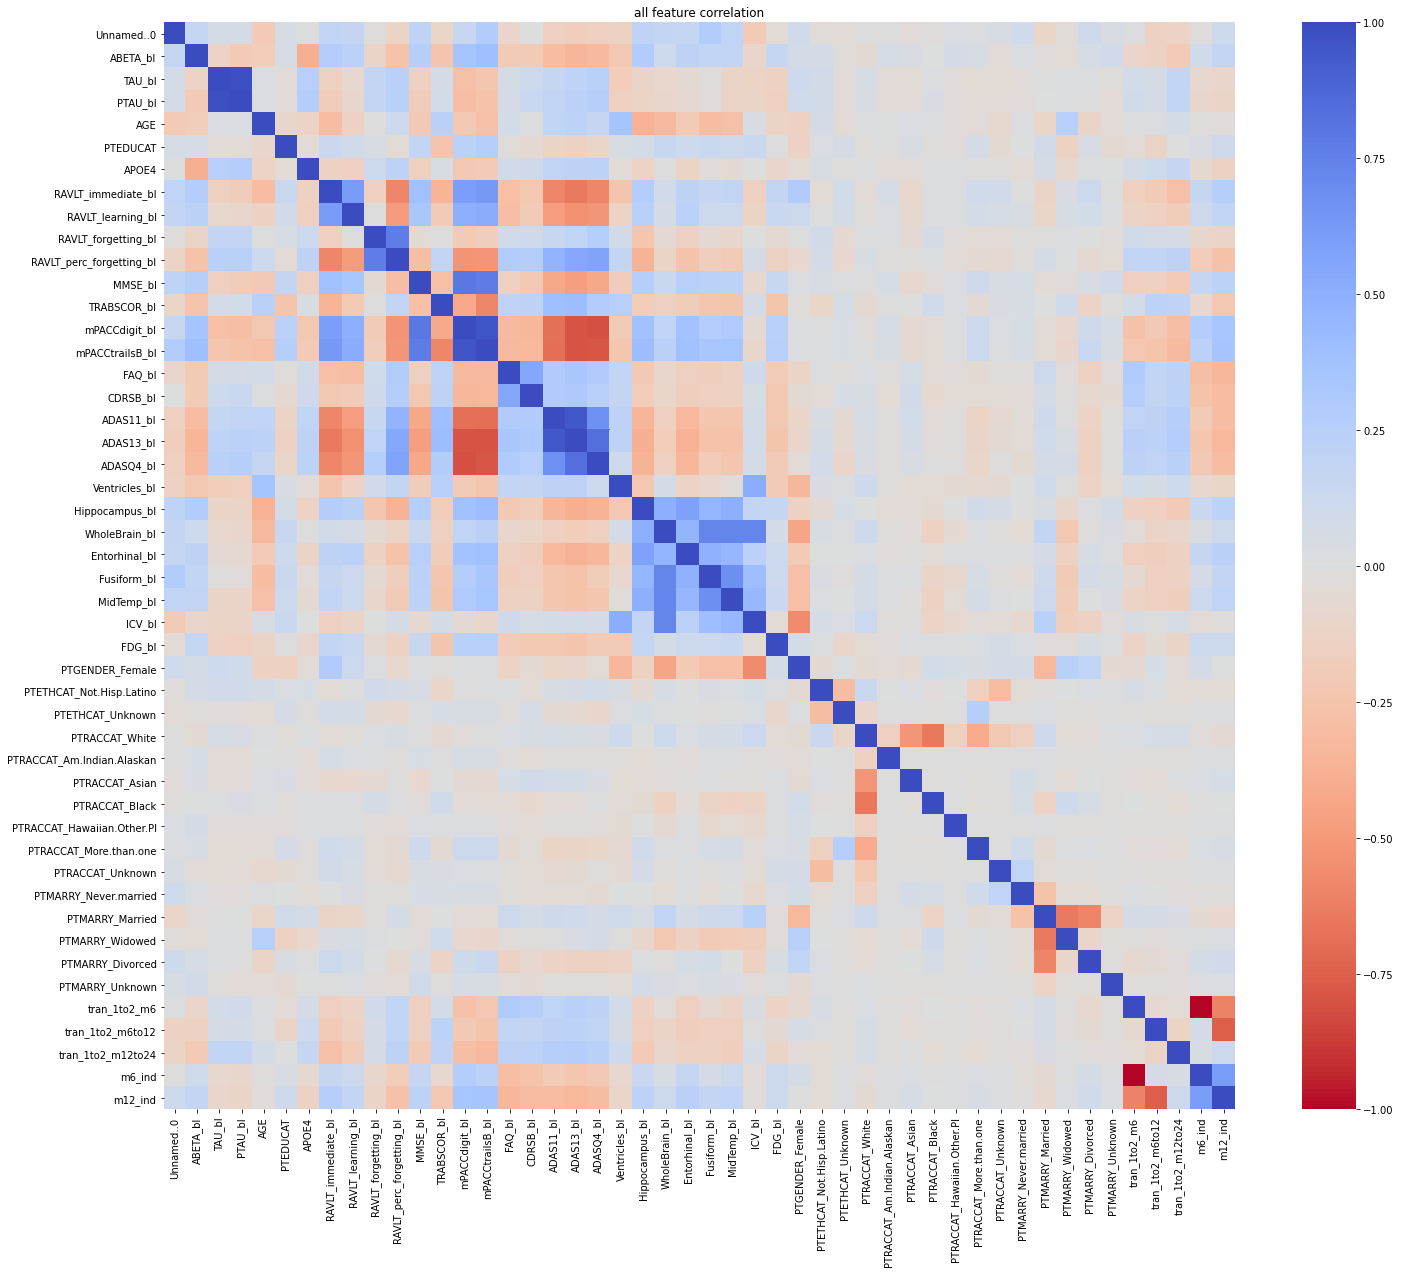

In [ ]:
f, (ax1) = plt.subplots(1,1, figsize=(24,20))
sns.heatmap(corr,cmap = 'coolwarm_r',annot_kws={'size':20},ax = ax1)
ax1.set_title("all feature correlation")
plt.show

### VIF

In [ ]:
features_df = data.drop(columns=['tran_1to2_m6','tran_1to2_m6to12','tran_1to2_m12to24', 'm6_ind', 'm12_ind'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# store categorical feature and feature names
features_name = list(features_df.columns)
# standardize continuous features
features_df = pd.DataFrame(StandardScaler().fit_transform(features_df))
features_df.columns = features_name

In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [ ]:
vif = calc_vif(features_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
42,PTMARRY_Unknown,inf
31,PTRACCAT_White,inf
33,PTRACCAT_Asian,inf
34,PTRACCAT_Black,inf
35,PTRACCAT_Hawaiian.Other.PI,inf
36,PTRACCAT_More.than.one,inf
37,PTRACCAT_Unknown,inf
38,PTMARRY_Never.married,inf
32,PTRACCAT_Am.Indian.Alaskan,inf
41,PTMARRY_Divorced,inf


In [ ]:
# get the name of OHE features
features_ohe = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] >= 1000] 
features_ohe

['PTRACCAT_White',
 'PTRACCAT_Am.Indian.Alaskan',
 'PTRACCAT_Asian',
 'PTRACCAT_Black',
 'PTRACCAT_Hawaiian.Other.PI',
 'PTRACCAT_More.than.one',
 'PTRACCAT_Unknown',
 'PTMARRY_Never.married',
 'PTMARRY_Married',
 'PTMARRY_Widowed',
 'PTMARRY_Divorced',
 'PTMARRY_Unknown']

In [ ]:
# record df with ohe
ohe_df = features_df

# df without ohe features 
features_df = features_df.drop(columns=features_ohe)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
14,mPACCtrailsB_bl,48.102411
3,PTAU_bl,40.391762
2,TAU_bl,40.019259
18,ADAS13_bl,38.301325
13,mPACCdigit_bl,27.018087
17,ADAS11_bl,19.423368
19,ADASQ4_bl,11.346076
10,RAVLT_perc_forgetting_bl,9.493453
22,WholeBrain_bl,7.872264
11,MMSE_bl,6.495760


In [ ]:
# get the name of features with VIF >= 5
features_value_vif = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] >= 5] 
features_value_vif

['TAU_bl',
 'PTAU_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'MMSE_bl',
 'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'WholeBrain_bl',
 'ICV_bl']

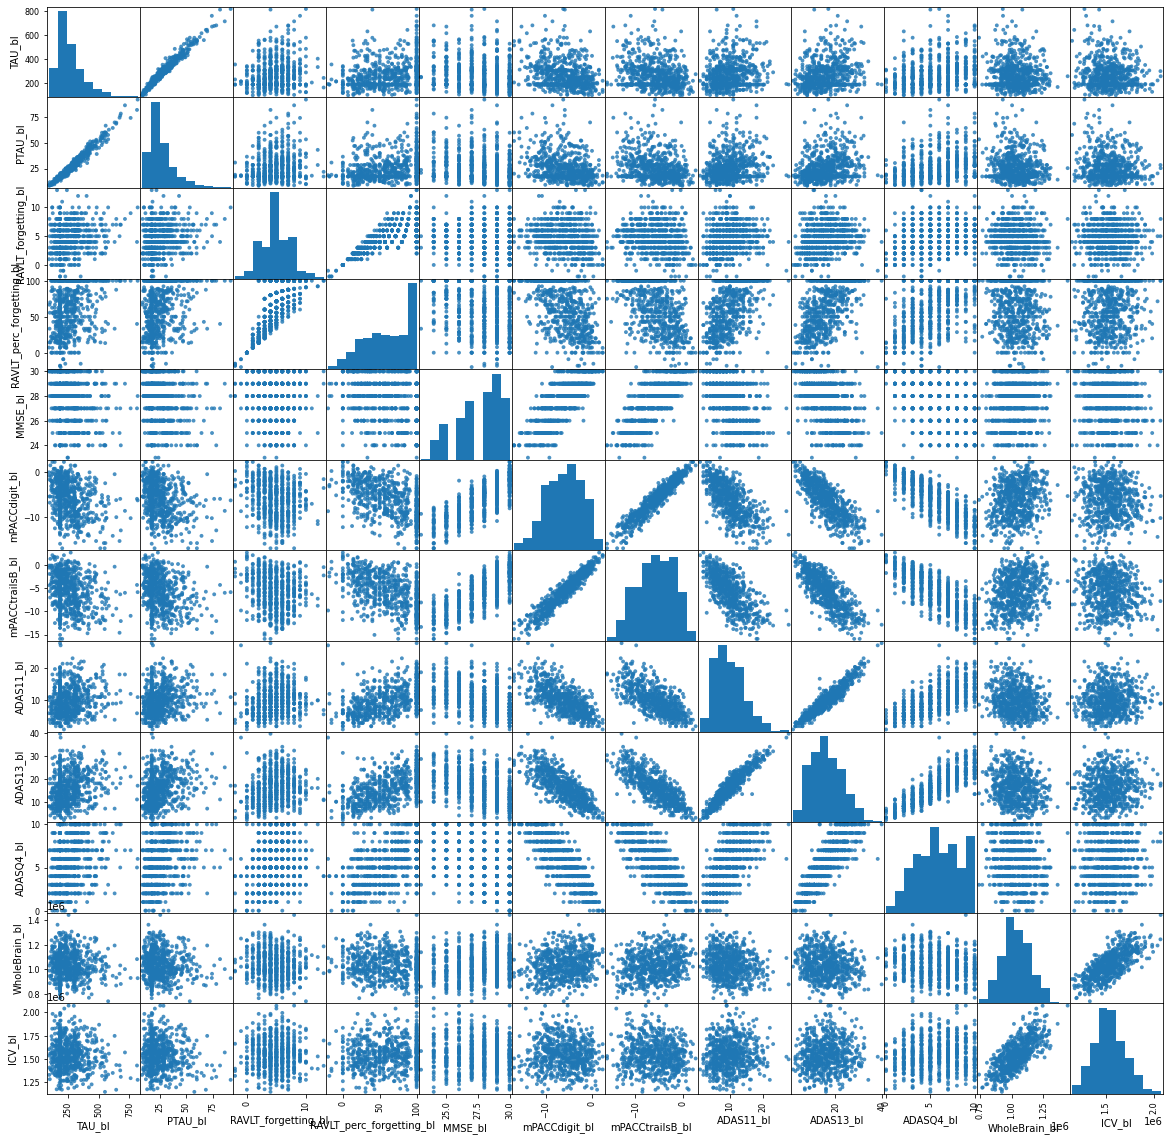

In [ ]:
plot = pd.plotting.scatter_matrix(data[features_value_vif], figsize=(20, 20), s=60, alpha=.8)

'TAU_bl', 'PTAU_bl'

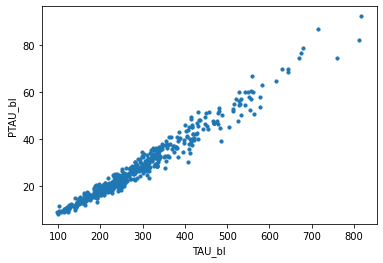

In [ ]:
plot = data.plot.scatter(x = 'TAU_bl', y = 'PTAU_bl', s=10)

'WholeBrain_bl',
 'ICV_bl'

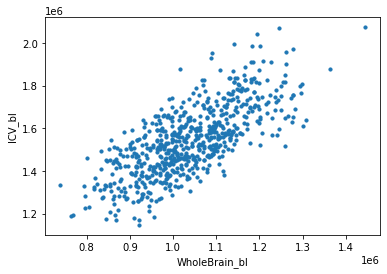

In [ ]:
plot = data.plot.scatter(x = 'WholeBrain_bl', y = 'ICV_bl', s=10)

'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl'

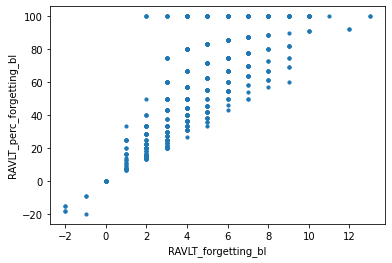

In [ ]:
plot = data.plot.scatter(x = 'RAVLT_forgetting_bl', y = 'RAVLT_perc_forgetting_bl', s=10)

In [ ]:
plotf = ['mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl']

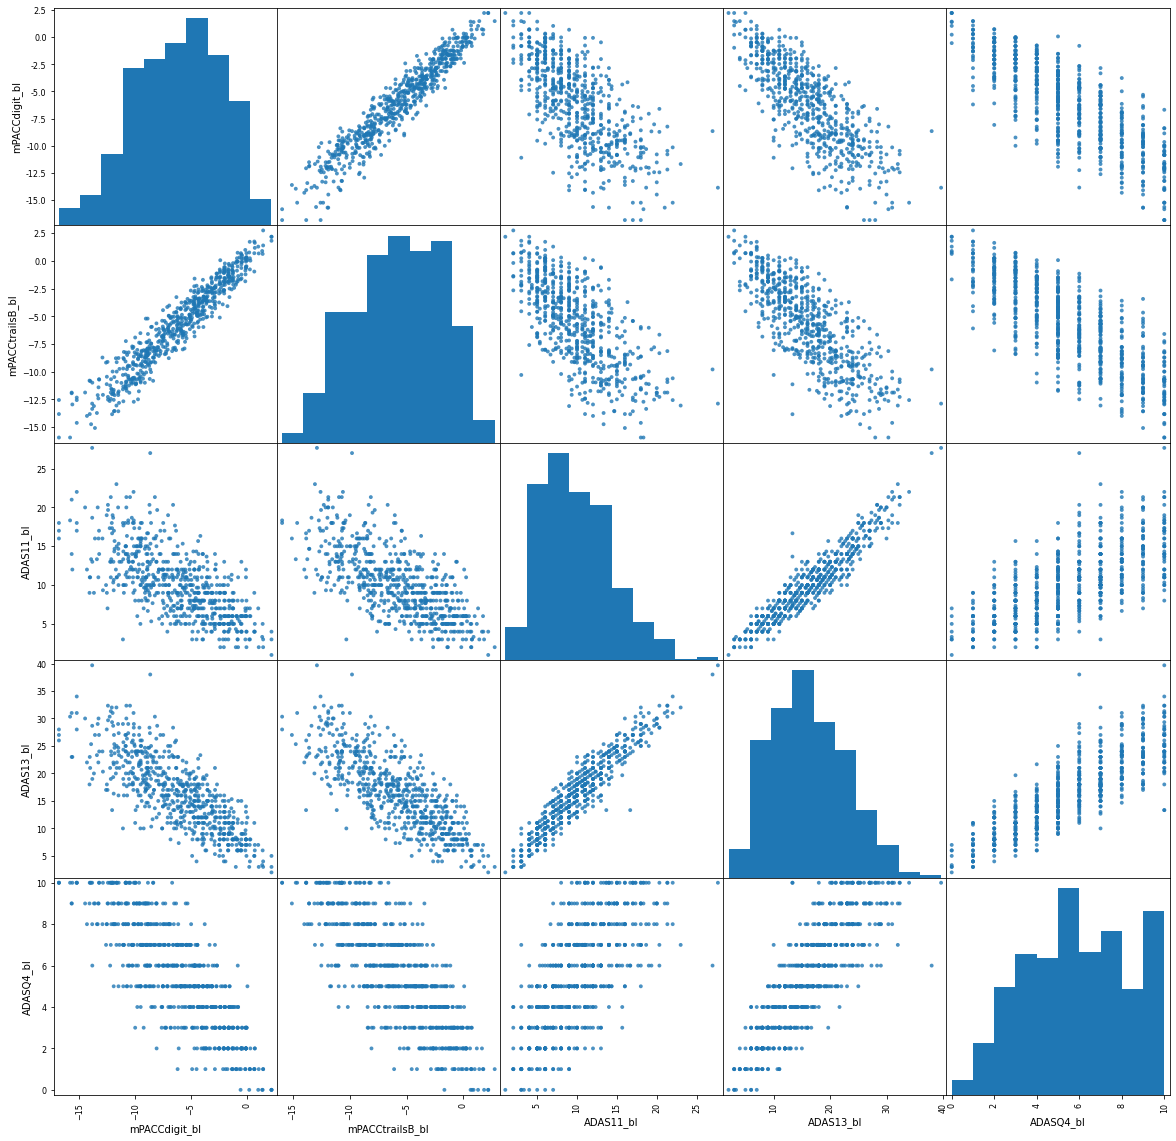

In [ ]:
plot = pd.plotting.scatter_matrix(data[plotf], figsize=(20, 20), s=60, alpha=.8)

#### Until VIF < 5

In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['mPACCtrailsB_bl'] 48.102410751908636


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,PTAU_bl,40.346197
2,TAU_bl,39.976308
17,ADAS13_bl,38.277982
16,ADAS11_bl,19.414462
13,mPACCdigit_bl,14.223903
18,ADASQ4_bl,10.147565
10,RAVLT_perc_forgetting_bl,9.472824
21,WholeBrain_bl,7.785828
25,ICV_bl,6.189480
9,RAVLT_forgetting_bl,5.855641


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['PTAU_bl'] 40.34619672718558


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
16,ADAS13_bl,38.219552
15,ADAS11_bl,19.375297
12,mPACCdigit_bl,14.195677
17,ADASQ4_bl,10.110733
9,RAVLT_perc_forgetting_bl,9.472006
20,WholeBrain_bl,7.771202
24,ICV_bl,6.189383
8,RAVLT_forgetting_bl,5.855523
10,MMSE_bl,4.934179
6,RAVLT_immediate_bl,3.234478


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['ADAS13_bl'] 38.21955196014554


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
12,mPACCdigit_bl,14.130447
9,RAVLT_perc_forgetting_bl,9.469459
19,WholeBrain_bl,7.766869
23,ICV_bl,6.189257
8,RAVLT_forgetting_bl,5.854755
16,ADASQ4_bl,5.626895
10,MMSE_bl,4.926464
6,RAVLT_immediate_bl,3.229418
21,Fusiform_bl,2.693504
22,MidTemp_bl,2.615485


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['mPACCdigit_bl'] 14.130447086358252


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
9,RAVLT_perc_forgetting_bl,9.460573
18,WholeBrain_bl,7.756323
22,ICV_bl,6.179850
8,RAVLT_forgetting_bl,5.854586
6,RAVLT_immediate_bl,3.216501
20,Fusiform_bl,2.693485
21,MidTemp_bl,2.614645
7,RAVLT_learning_bl,2.556382
15,ADASQ4_bl,2.505077
16,Ventricles_bl,2.325881


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['RAVLT_perc_forgetting_bl'] 9.460573297485821


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
17,WholeBrain_bl,7.753459
21,ICV_bl,6.169227
19,Fusiform_bl,2.691105
20,MidTemp_bl,2.611765
6,RAVLT_immediate_bl,2.516846
14,ADASQ4_bl,2.499928
15,Ventricles_bl,2.324825
13,ADAS11_bl,2.315947
16,Hippocampus_bl,2.099691
7,RAVLT_learning_bl,1.869579


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['WholeBrain_bl'] 7.7534593086814


In [ ]:
# delete feature with max vif 
features_df = features_df.drop(columns=features_value_max)

# calculate again
vif = calc_vif(features_df)
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
20,ICV_bl,2.863992
6,RAVLT_immediate_bl,2.516833
14,ADASQ4_bl,2.494193
18,Fusiform_bl,2.432806
19,MidTemp_bl,2.317991
13,ADAS11_bl,2.315913
15,Ventricles_bl,2.094145
16,Hippocampus_bl,2.056850
7,RAVLT_learning_bl,1.869551
22,PTGENDER_Female,1.790888


In [ ]:
# get the max vif
vif_max = max(vif['VIF'])
features_value_max = [vif['Features'].iloc[i] for i in range(len(vif)) if vif['VIF'].iloc[i] == vif_max]
print(features_value_max, vif_max)

['ICV_bl'] 2.8639923579626076


## Outlier

In [ ]:
data_outlier = data.drop(columns=['tran_1to2_m6','tran_1to2_m6to12','tran_1to2_m12to24']+features_ohe)

### Interquartile Range (IQR)

In [ ]:
Q1 = data_outlier.quantile(0.25)
Q3 = data_outlier.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outlier_num = ((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).sum(axis=1)
outlier_num = outlier_num.to_frame(name="Number of attributes").reset_index()

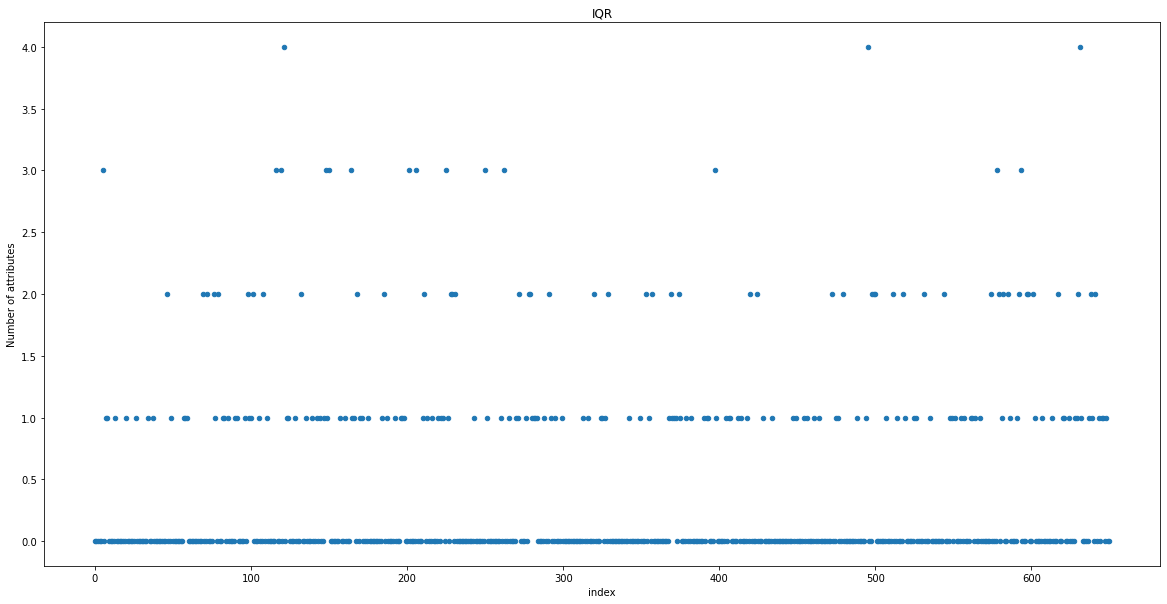

In [ ]:
outlier_num.plot(x='index', y='Number of attributes', kind = 'scatter', title='IQR', figsize=(20,10))

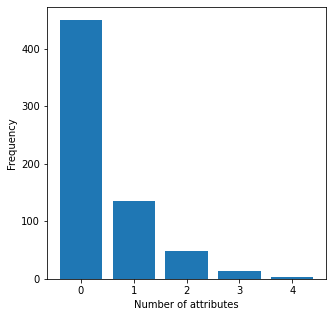

In [ ]:
val_counts = outlier_num['Number of attributes'].value_counts()
values, counts = val_counts.index, val_counts

plt.figure(figsize=(5,5))
plt.bar(values, counts)
plt.xlabel('Number of attributes')
plt.ylabel('Frequency')
# plt.xticks(np.arange(0,19,step=1))

plt.show()

#### Obeservation Examples

In [ ]:
# observations
data[((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).sum(axis=1)>=3]

,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_Female,PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown,PTRACCAT_White,PTRACCAT_Am Indian/Alaskan,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTMARRY_Never married,PTMARRY_Married,PTMARRY_Widowed,PTMARRY_Divorced,PTMARRY_Unknown,tran_1to2_m6,tran_1to2_m6to12,tran_1to2_m12to24
5,1096.5,283.033333,26.59,77.6,16,0,30,3,6,75.00000,26,300.0,-11.10050,-11.58370,13,3.5,18.00,29.00,6,123032.0,5319.000000,1088450.0,1791.0,15506.0,18422.0,1927830.0,1.161670,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
116,685.5,187.100000,17.34,68.4,20,0,50,8,1,7.69231,27,300.0,-6.19743,-6.09256,2,3.0,7.67,10.67,1,69728.0,6898.000000,933520.0,3001.0,14080.0,16070.0,1559070.0,0.873383,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
119,645.9,221.300000,20.33,75.9,6,0,24,5,5,71.42860,24,212.0,-14.32530,-13.98280,1,1.0,12.00,22.00,8,128593.0,7107.000000,1194450.0,2621.0,17094.0,19745.0,2040320.0,1.456190,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
121,685.5,187.100000,17.34,77.1,14,1,20,0,4,100.00000,25,121.0,-13.85910,-12.87210,11,4.0,27.67,39.67,10,48585.0,4996.000000,876681.0,2562.0,15035.0,16951.0,1496420.0,1.456190,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
148,533.1,577.500000,53.41,75.6,12,1,36,8,10,100.00000,27,205.0,-6.15253,-7.20063,1,2.0,8.67,13.67,3,56075.0,5628.000000,738813.0,3100.0,11228.0,10708.0,1332950.0,1.456190,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
150,594.2,141.700000,9.75,62.2,18,0,30,4,7,87.50000,26,274.0,-5.57591,-7.90202,1,4.0,9.33,12.33,3,91968.0,5896.000000,1181460.0,2822.0,18121.0,20129.0,1909560.0,1.456190,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
164,685.5,187.100000,17.34,73.5,10,1,26,3,4,57.14290,27,260.0,-7.23670,-8.35975,13,1.0,10.00,16.00,3,93791.0,8523.000000,1277240.0,4084.0,21133.0,24841.0,1969540.0,1.178560,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
201,685.5,187.100000,17.34,76.9,7,1,30,2,6,85.71430,25,300.0,-9.74845,-12.48630,2,1.0,15.00,24.00,6,39752.0,5390.000000,819569.0,2244.0,12295.0,13644.0,1365150.0,1.031170,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
206,732.9,190.500000,17.92,71.6,20,1,39,4,4,40.00000,25,243.0,-10.75850,-11.72070,0,2.0,11.67,17.67,5,100947.0,6354.000000,1200500.0,2756.0,17869.0,21807.0,1984300.0,1.456190,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
225,685.5,187.100000,17.34,56.2,18,0,28,3,3,42.85710,24,300.0,-13.60930,-15.07280,11,3.0,16.00,27.00,9,28718.0,7070.000000,1126300.0,4886.0,21754.0,18805.0,1764630.0,1.456190,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
# # remove outlier and export
# df_outlier_rmd = data[((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).sum(axis=1)<3]
# df_outlier_rmd.to_csv('/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/df_outlier_rmd.csv',index = False)

In [ ]:
def outlierExp(ind):
    a = ((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).iloc[ind]
    name = a[a.values].index.tolist()
    value = data_outlier[name].iloc[ind]
    meann = data_outlier[name].mean()
    res = pd.concat([value.rename('Value'),meann.rename('Mean')],axis=1)
    return res

In [ ]:
res = outlierExp(121)
res

,Value,Mean
FAQ_bl,11.00,3.105991
CDRSB_bl,4.00,1.491551
ADAS11_bl,27.67,10.049631
ADAS13_bl,39.67,16.215499


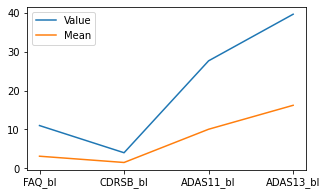

In [ ]:
res_ind = res.reset_index().rename(columns={"index":"attribute"})
ax = res_ind.plot(xticks=res_ind.index, figsize=(5,3))
ax.set_xticklabels(res_ind["attribute"])
ax

In [ ]:
res = outlierExp(495)
res

,Value,Mean
TAU_bl,816.90,270.861925
PTAU_bl,92.08,26.032504
FAQ_bl,11.00,3.105991
CDRSB_bl,4.00,1.491551


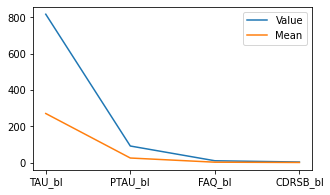

In [ ]:
res_ind = res.reset_index().rename(columns={"index":"attribute"})
ax = res_ind.plot(xticks=res_ind.index, figsize=(5,3))
ax.set_xticklabels(res_ind["attribute"])
ax

In [ ]:
res = outlierExp(631)
res

,Value,Mean
TRABSCOR_bl,300.0,113.413722
FAQ_bl,11.0,3.105991
ADAS11_bl,27.0,10.049631
ADAS13_bl,38.0,16.215499


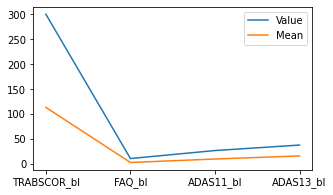

In [ ]:
res_ind = res.reset_index().rename(columns={"index":"attribute"})
ax = res_ind.plot(xticks=res_ind.index, figsize=(5,3))
ax.set_xticklabels(res_ind["attribute"])
ax

In [ ]:
res = outlierExp(495)
res

,Value,Mean
TAU_bl,816.90,270.861925
PTAU_bl,92.08,26.032504
FAQ_bl,11.00,3.105991
CDRSB_bl,4.00,1.491551


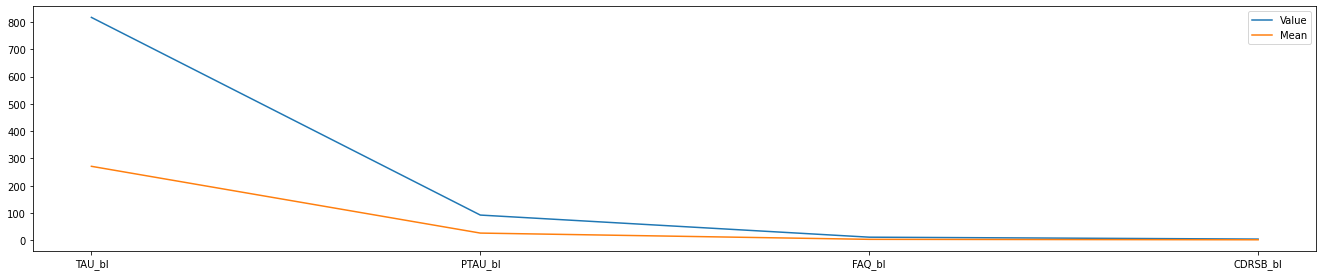

In [ ]:
res_ind = res.reset_index().rename(columns={"index":"attribute"})
ax = res_ind.plot(xticks=res_ind.index, figsize=(23,4.5))
ax.set_xticklabels(res_ind["attribute"])
ax

#### Attribute Examples

In [ ]:
((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).sum(axis=0).sort_values(ascending=False)

TRABSCOR_bl                 60
FAQ_bl                      51
PTAU_bl                     33
TAU_bl                      32
Ventricles_bl               22
PTETHCAT_Not Hisp/Latino    21
CDRSB_bl                    14
Fusiform_bl                  9
RAVLT_immediate_bl           9
RAVLT_forgetting_bl          9
ICV_bl                       6
MidTemp_bl                   5
PTEDUCAT                     3
ADAS11_bl                    3
PTETHCAT_Unknown             2
ADAS13_bl                    2
WholeBrain_bl                2
Entorhinal_bl                2
FDG_bl                       1
mPACCtrailsB_bl              0
mPACCdigit_bl                0
ADASQ4_bl                    0
MMSE_bl                      0
RAVLT_perc_forgetting_bl     0
Hippocampus_bl               0
RAVLT_learning_bl            0
APOE4                        0
AGE                          0
PTGENDER_Female              0
ABETA_bl                     0
Unnamed: 0                   0
dtype: int64

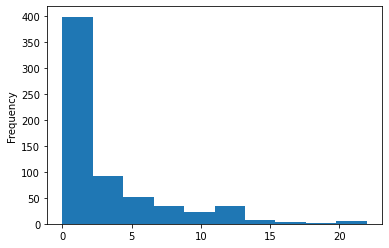

In [ ]:
# FAQ_bl
data_outlier['FAQ_bl'].plot.hist()

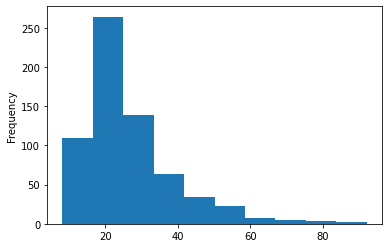

In [ ]:
# PTAU_bl
data_outlier['PTAU_bl'].plot.hist()

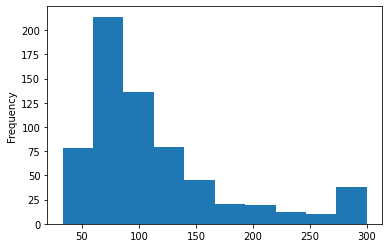

In [ ]:
# TRABSCOR_bl
data_outlier['TRABSCOR_bl'].plot.hist()

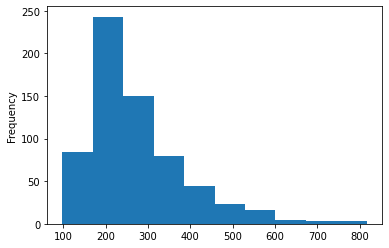

In [ ]:
# TAU_bl
data_outlier['TAU_bl'].plot.hist()

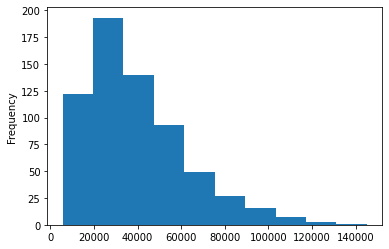

In [ ]:
# Ventricles_bl
data_outlier['Ventricles_bl'].plot.hist()

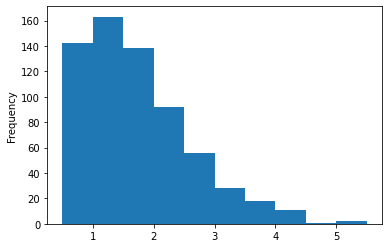

In [ ]:
# CDRSB_bl
data_outlier['CDRSB_bl'].plot.hist()

### Isolation Forest

Isolate observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso = IsolationForest(contamination=0.1)
score = iso.fit_predict(data_outlier)

In [ ]:
# observations
pd.options.display.max_rows = 10
data_ori[score==-1]

,Unnamed: 0,level_0,index,RID,COLPROT,ORIGPROT,EXAMDATE,EXAMDATE_bl,Years_bl,Month_bl,Month,DX,DX_bl,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_Female,PTGENDER_Male,PTETHCAT_Not Hisp/Latino,PTETHCAT_Hisp/Latino,PTETHCAT_Unknown,PTRACCAT_White,PTRACCAT_Am Indian/Alaskan,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTMARRY_Never married,PTMARRY_Married,PTMARRY_Widowed,PTMARRY_Divorced,PTMARRY_Unknown,m0_label,m3_label,m6_label,m12_label,m18_label,m24_label,m30_label,m36_label,m48_label,tran_1to2_m3,tran_1to2_m6,tran_1to2_m12,tran_1to2_m18,tran_1to2_m24,tran_1to2_m30,tran_1to2_m36,tran_1to2_m48,tran_1to2_m6to12,tran_1to2_m12to24
5,6,235,5209,50,2,2,2005-12-02,2005-12-02,0,0,0,1,1,1096.5,283.033333,26.59,77.6,16,0,30,3,6,75.00000,26,300.0,-11.100500,-11.583700,13,3.5,18.00,29.00,6,123032.0,5319.0,1088450.0,1791.0,15506.0,18422.0,1927830.0,1.161670,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,2,2,2.0,2,2.0,2.0,NaN,NaN,1,1,1.0,1,1.0,1.0,NaN,0,0
7,8,260,101,54,2,2,2005-12-16,2005-12-16,0,0,0,1,1,685.5,187.100000,17.34,81.0,20,0,26,3,6,100.00000,27,201.0,-12.446000,-12.271000,12,2.5,20.33,32.33,10,69287.0,4845.0,833179.0,1608.0,13023.0,14532.0,1494880.0,0.935685,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,2,2.0,2,2.0,2.0,NaN,NaN,0,1,1.0,1,1.0,1.0,NaN,1,0
69,70,1941,813,362,2,2,2006-04-19,2006-04-19,0,0,0,1,1,414.1,680.200000,78.46,70.5,16,1,31,2,7,100.00000,24,76.0,-12.893300,-12.081700,1,1.0,9.33,20.33,10,18167.0,5151.0,880109.0,2157.0,14320.0,13821.0,1308430.0,1.214030,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,NaN,1,1,1.0,1,NaN,2.0,2.0,NaN,0,0,0.0,0,NaN,1.0,1.0,0,0
77,78,2103,6055,394,2,2,2006-06-23,2006-06-23,0,0,0,1,1,643.4,321.300000,33.87,84.0,12,0,17,3,5,100.00000,27,300.0,-11.519500,-12.100800,7,2.5,14.00,24.00,8,60289.0,5172.0,830887.0,2663.0,12898.0,16353.0,1312660.0,1.006160,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,2,2.0,2,2.0,2.0,NaN,NaN,0,1,1.0,1,1.0,1.0,NaN,1,0
95,96,2572,1100,507,2,2,2006-05-29,2006-05-29,0,0,0,1,1,449.8,289.700000,31.48,55.2,18,0,16,2,4,100.00000,25,60.0,-10.740300,-9.764540,10,2.5,16.33,26.33,9,38365.0,5904.0,837063.0,2697.0,12571.0,12479.0,1278260.0,1.456190,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,1,2,2.0,2,2.0,2.0,NaN,NaN,0,1,1.0,1,1.0,1.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,11765,3549,4936,1,1,2012-10-01,2012-10-01,0,0,0,1,1,518.3,191.600000,18.52,78.1,19,0,18,3,-1,-20.00000,27,300.0,-8.651840,-9.790100,11,1.5,27.00,38.00,6,33093.0,7361.0,1092180.0,4101.0,18429.0,23911.0,1523710.0,1.013810,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1.0,1,1,NaN,2,NaN,2.0,NaN,0.0,0,0,NaN,1,NaN,1.0,NaN,0,1
632,633,11779,3528,4941,1,1,2012-10-22,2012-10-22,0,0,0,1,1,1337.0,139.300000,11.50,60.2,14,1,57,10,3,20.00000,30,44.0,0.680622,1.747330,0,1.5,4.00,5.00,1,33643.0,7019.0,1135350.0,5896.0,19083.0,19963.0,1568700.0,1.365700,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1.0,1,1,1.0,1,NaN,1.0,NaN,0.0,0,0,0.0,0,NaN,0.0,NaN,0,0
637,638,11858,3457,4966,1,1,2012-10-18,2012-10-18,0,0,0,1,1,1372.0,125.100000,11.31,61.7,16,0,65,7,1,6.66667,30,60.0,2.221070,2.176240,1,1.0,4.00,5.00,0,62239.0,6792.0,1164410.0,3452.0,22432.0,23597.0,1658920.0,1.441770,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1.0,1,1,NaN,1,NaN,1.0,NaN,0.0,0,0,NaN,0,NaN,0.0,NaN,0,0
638,639,11871,3444,4974,1,1,2012-11-05,2012-11-05,0,0,0,1,1,677.4,630.100000,69.87,73.4,19,0,44,8,4,33.33330,29,73.0,-0.479177,-0.310268,5,2.0,4.00,7.00,2,52627.0,7096.0,1194660.0,5167.0,22927.0,22428.0,1747590.

## Feature Scalling


### Log Transformation + MinMax Scale

In [ ]:
pd.options.display.max_rows = 100
data.skew().sort_values(ascending=False)

PTRACCAT_Am.Indian.Alaskan    25.514702
PTRACCAT_Hawaiian.Other.PI    25.514702
PTRACCAT_More.than.one         9.509331
PTRACCAT_Asian                 7.513924
PTMARRY_Never.married          7.176769
PTRACCAT_Black                 5.956876
PTETHCAT_Hisp.Latino           5.606962
tran_1to2_m6                   4.034493
tran_1to2_m6to12               3.145677
PTMARRY_Divorced               2.891445
PTMARRY_Widowed                2.619686
tran_1to2_m12to24              1.959017
FAQ_bl                         1.782583
PTAU_bl                        1.623828
TRABSCOR_bl                    1.577105
TAU_bl                         1.418663
Ventricles_bl                  1.200305
CDRSB_bl                       1.048520
ABETA_bl                       0.698436
RAVLT_immediate_bl             0.687297
APOE4                          0.643156
ADAS11_bl                      0.609526
PTGENDER_Female                0.372716
RAVLT_learning_bl              0.357338
ADAS13_bl                      0.351451


In [ ]:
skew_cols = ['TAU_bl', 'PTAU_bl', 'TRABSCOR_bl', 'FAQ_bl', 'CDRSB_bl','Ventricles_bl']

In [ ]:
# if not remove outlier
df_outlier_rmd = data

In [ ]:
epsilon = 1e-16
df_outlier_rmd[skew_cols] = np.log(df_outlier_rmd[skew_cols] + 1 + epsilon)

In [ ]:
df_features = df_outlier_rmd.drop(['tran_1to2_m6', 'tran_1to2_m6to12', 'tran_1to2_m12to24', 'm6_ind', 'm12_ind'], axis = 1)
columns_name = df_features.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_features))
data_scaled.columns = columns_name
data_scaled = pd.concat([data_scaled, df_outlier_rmd[['tran_1to2_m6', 'tran_1to2_m6to12', 'tran_1to2_m12to24', 'm6_ind', 'm12_ind']]], axis=1)

In [ ]:
data_scaled

,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_Female,PTETHCAT_Not.Hisp.Latino,PTETHCAT_Hisp.Latino,PTRACCAT_White,PTRACCAT_Am.Indian.Alaskan,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian.Other.PI,PTRACCAT_More.than.one,PTMARRY_Never.married,PTMARRY_Married,PTMARRY_Widowed,PTMARRY_Divorced,tran_1to2_m6,tran_1to2_m6to12,tran_1to2_m12to24,m6_ind,m12_ind
0,0.318075,0.304329,0.297771,0.697802,0.500000,0.0,0.333333,0.214286,0.466667,0.861111,0.285714,0.735315,0.342900,0.259999,0.000000,0.000000,0.662542,0.628351,0.7,0.601630,0.260891,0.267588,0.177313,0.479244,0.381726,0.365925,0.280728,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,1
1,0.081468,0.587021,0.603858,0.686813,0.928571,0.0,0.438596,0.571429,0.800000,0.924242,0.857143,0.648989,0.443970,0.387221,0.620607,0.196191,0.337458,0.530926,1.0,0.422600,0.609551,0.427463,0.696749,0.487383,0.424451,0.476616,0.460628,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
2,0.309673,0.577085,0.588492,0.777473,1.000000,0.0,0.175439,0.428571,0.533333,1.000000,0.857143,0.499259,0.545869,0.433817,0.620607,0.472707,0.625047,0.628351,0.6,0.550419,0.591804,0.422358,0.684019,0.404170,0.499193,0.635794,0.351503,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,1
3,0.135982,0.383399,0.314645,0.436813,0.571429,1.0,0.192982,0.071429,0.400000,1.000000,0.285714,0.668232,0.352117,0.172637,0.513296,0.348368,0.649794,0.698965,1.0,0.590188,0.384156,0.320451,0.374176,0.186150,0.371556,0.395670,0.460628,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,1
4,0.702897,0.441061,0.318257,0.489011,0.857143,0.0,0.315789,0.571429,0.666667,0.907408,1.000000,0.503777,0.674251,0.594502,0.350379,0.000000,0.224972,0.265463,0.5,0.665077,0.057438,0.303423,0.292566,0.384760,0.285245,0.402523,0.732763,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,0.284533,0.314289,0.285336,0.692308,0.571429,0.0,0.245614,0.214286,0.466667,1.000000,0.285714,0.356623,0.305588,0.413301,0.734361,0.472707,0.299963,0.371649,0.7,0.788650,0.211197,0.240111,0.147761,0.376871,0.447912,0.114031,0.393202,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,1
647,0.530147,0.639156,0.602112,0.379121,0.714286,1.0,0.315789,0.428571,0.600000,0.895833,1.000000,0.311055,0.517389,0.588130,0.000000,0.196191,0.337458,0.398195,0.7,0.420615,0.675863,0.470232,0.635826,0.496462,0.609933,0.418152,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,1
648,0.275728,0.782248,0.778640,0.678571,0.785714,0.5,0.649123,0.928571,0.266667,0.285714,0.571429,0.701541,0.533456,0.491550,0.000000,0.472707,0.374953,0.424741,0.6,0.664926,0.747338,0.487604,0.478518,0.572600,0.594759,0.466574,0.411063,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,1
649,1.000000,0.494648,0.463363,0.181319,0.714286,0.5,0.508772,0.500000,0.400000,0.500000,0.714286,0.490088,0.656633,0.644795,0.513296,0.472707,0.299963,0.371649,0.5,0.224906,0.531462,0.291897,0.416231,0.467097,0.462226,0.094445,0.569393,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,1


In [ ]:
# # export
data_scaled.to_csv('/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/df_log_scaled.csv', index = False)

## New Patients

In [23]:
# read the file
path = '/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/new_points.csv'
new_ori = pd.read_csv(path)

In [24]:
new_ori.head()

,Unnamed: 0,level_0,index,RID,COLPROT,ORIGPROT,EXAMDATE,EXAMDATE_bl,Years_bl,Month_bl,Month,DX,DX_bl,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_0,PTGENDER_1,PTETHCAT_0,PTETHCAT_1,PTETHCAT_2,PTRACCAT_0,PTRACCAT_1,PTRACCAT_2,PTRACCAT_3,PTRACCAT_4,PTRACCAT_5,PTRACCAT_6,PTMARRY_0,PTMARRY_1,PTMARRY_2,PTMARRY_3,PTMARRY_4
0,1,0,0,2,2,2,2005-09-08,2005-09-08,0,0,0,0,0,685.5,187.1,17.34,74.3,16,0,44,4,6,54.5455,28,112.0,-4.39437,-4.20462,0.0,0.0,10.67,18.67,5,118233.0,8336.0,1229740.0,4177.0,16559.0,27936.0,1984660.0,1.36665,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,2,13,1,3,2,2,2005-09-12,2005-09-12,0,0,0,2,2,741.5,239.7,22.83,81.3,18,1,22,1,4,100.0000,20,148.0,-16.55740,-16.14580,10.0,4.5,22.00,31.00,8,84599.0,5319.0,1129830.0,1791.0,15506.0,18422.0,1920690.0,1.08355,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,3,18,5,4,2,2,2005-11-08,2005-11-08,0,0,0,1,1,1501.0,153.1,13.29,67.5,10,0,37,7,4,36.3636,27,271.0,-8.52261,-9.54819,0.0,1.0,14.33,21.33,6,39605.0,6869.0,1154980.0,3983.0,19036.0,19615.0,1679440.0,1.45619,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,4,24,10,5,2,2,2005-09-07,2005-09-07,0,0,0,0,0,547.3,337.0,33.43,73.7,16,0,37,4,4,44.4444,29,90.0,-1.94434,-1.62965,0.0,0.0,8.67,14.67,4,34062.0,7075.0,1116630.0,4433.0,24788.0,21614.0,1640770.0,1.29343,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,5,38,20,7,2,2,2005-10-06,2005-10-06,0,0,0,2,2,410.2,362.1,34.90,75.4,10,1,17,2,3,75.0000,20,300.0,-19.84240,-19.54150,17.0,6.0,27.33,40.33,10,25704.0,6729.0,875798.0,2050.0,12063.0,15374.0,1353520.0,1.33659,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [25]:
### rename
new_ori = new_ori.rename(columns={"PTGENDER_0": "PTGENDER_Female", "PTGENDER_1": "PTGENDER_Male", 
                          "PTETHCAT_0": "PTETHCAT_Not Hisp/Latino", "PTETHCAT_1": "PTETHCAT_Hisp/Latino", "PTETHCAT_2": "PTETHCAT_Unknown", 
                          "PTRACCAT_0": "PTRACCAT_White", "PTRACCAT_1": "PTRACCAT_Am Indian/Alaskan", "PTRACCAT_2": "PTRACCAT_Asian", "PTRACCAT_3": "PTRACCAT_Black", "PTRACCAT_4": "PTRACCAT_Hawaiian/Other PI", "PTRACCAT_5": "PTRACCAT_More than one", "PTRACCAT_6": "PTRACCAT_Unknown",
                          "PTMARRY_0": "PTMARRY_Never married", "PTMARRY_1": "PTMARRY_Married", "PTMARRY_2": "PTMARRY_Widowed", "PTMARRY_3": "PTMARRY_Divorced", "PTMARRY_4": "PTMARRY_Unknown"})

In [26]:
list(new_ori.columns)

['Unnamed: 0',
 'level_0',
 'index',
 'RID',
 'COLPROT',
 'ORIGPROT',
 'EXAMDATE',
 'EXAMDATE_bl',
 'Years_bl',
 'Month_bl',
 'Month',
 'DX',
 'DX_bl',
 'ABETA_bl',
 'TAU_bl',
 'PTAU_bl',
 'AGE',
 'PTEDUCAT',
 'APOE4',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'MMSE_bl',
 'TRABSCOR_bl',
 'mPACCdigit_bl',
 'mPACCtrailsB_bl',
 'FAQ_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'Ventricles_bl',
 'Hippocampus_bl',
 'WholeBrain_bl',
 'Entorhinal_bl',
 'Fusiform_bl',
 'MidTemp_bl',
 'ICV_bl',
 'FDG_bl',
 'PTGENDER_Female',
 'PTGENDER_Male',
 'PTETHCAT_Not Hisp/Latino',
 'PTETHCAT_Hisp/Latino',
 'PTETHCAT_Unknown',
 'PTRACCAT_White',
 'PTRACCAT_Am Indian/Alaskan',
 'PTRACCAT_Asian',
 'PTRACCAT_Black',
 'PTRACCAT_Hawaiian/Other PI',
 'PTRACCAT_More than one',
 'PTRACCAT_Unknown',
 'PTMARRY_Never married',
 'PTMARRY_Married',
 'PTMARRY_Widowed',
 'PTMARRY_Divorced',
 'PTMARRY_Unknown']

In [27]:
new = new_ori.drop(columns=['Unnamed: 0','RID','level_0', 'index', 'COLPROT','ORIGPROT','EXAMDATE','EXAMDATE_bl','DX_bl','DX','Years_bl', 'Month_bl', 'Month',  
                              'PTGENDER_Male', 'PTETHCAT_Unknown', 'PTRACCAT_Unknown', 'PTMARRY_Unknown'])

In [28]:
skew_cols = ['TAU_bl', 'PTAU_bl', 'TRABSCOR_bl', 'FAQ_bl', 'CDRSB_bl','Ventricles_bl']

In [29]:
epsilon = 1e-16
new[skew_cols] = np.log(new[skew_cols] + 1 + epsilon)

In [30]:
columns_name = new.columns

In [31]:
from sklearn.preprocessing import MinMaxScaler
new_scaled = pd.DataFrame(MinMaxScaler().fit_transform(new))
new_scaled.columns = columns_name

In [33]:
new_scaled_rid = pd.concat([new_ori['RID'], new_scaled], axis=1)

In [ ]:
new_scaled

,ABETA_bl,TAU_bl,PTAU_bl,AGE,PTEDUCAT,APOE4,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,MMSE_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,FAQ_bl,CDRSB_bl,ADAS11_bl,ADAS13_bl,ADASQ4_bl,Ventricles_bl,Hippocampus_bl,WholeBrain_bl,Entorhinal_bl,Fusiform_bl,MidTemp_bl,ICV_bl,FDG_bl,PTGENDER_Female,PTETHCAT_Not Hisp/Latino,PTETHCAT_Hisp/Latino,PTRACCAT_White,PTRACCAT_Am Indian/Alaskan,PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTMARRY_Never married,PTMARRY_Married,PTMARRY_Widowed,PTMARRY_Divorced
0,0.323667,0.357900,0.290892,0.536313,0.750,0.0,0.614286,0.5000,0.769231,0.857143,0.846154,0.828333,0.639737,0.622581,0.000000,0.000000,0.250059,0.341504,0.5,0.937889,0.683121,0.686167,0.639024,0.361086,0.813579,0.875565,0.692380,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.361000,0.462645,0.397897,0.731844,0.875,0.5,0.300000,0.3125,0.717949,1.000000,0.230769,0.876792,0.228425,0.233502,0.698283,0.710935,0.515585,0.567039,0.8,0.833547,0.290180,0.563829,0.084785,0.310845,0.396555,0.812203,0.401119,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.867333,0.273208,0.188927,0.346369,0.375,0.0,0.514286,0.6875,0.717949,0.800000,0.769231,0.982249,0.500134,0.448472,0.000000,0.289065,0.335833,0.390159,0.6,0.596969,0.492055,0.594625,0.593961,0.479269,0.448847,0.573247,0.784502,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.231533,0.606861,0.548268,0.519553,0.750,0.0,0.514286,0.5000,0.717949,0.825397,0.923077,0.790393,0.722589,0.706481,0.000000,0.000000,0.203187,0.268337,0.4,0.549972,0.518885,0.547666,0.698490,0.753710,0.536469,0.534945,0.617049,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.140133,0.637290,0.565353,0.567039,0.375,0.5,0.228571,0.3750,0.692308,0.921429,0.230769,1.000000,0.117337,0.122861,0.841696,0.811508,0.640497,0.737699,1.0,0.462216,0.473821,0.252773,0.144948,0.146572,0.262953,0.250426,0.661454,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,0.828511,0.591896,0.503492,0.555866,0.750,0.5,0.514286,0.7500,0.666667,0.748572,0.923077,0.698950,0.816741,0.806219,0.000000,0.289065,0.265526,0.335284,0.5,0.490713,0.561561,0.428542,0.576771,0.492581,0.470851,0.268975,0.803017,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1290,0.828511,0.591896,0.503492,0.463687,0.750,0.5,0.642857,0.6875,0.641026,0.714286,0.923077,0.801581,0.709604,0.683225,0.000000,0.000000,0.218655,0.298701,0.5,0.490713,0.561561,0.428542,0.576771,0.492581,0.470851,0.268975,0.503089,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1291,0.828511,0.591896,0.503492,0.731844,0.500,0.5,0.314286,0.3125,0.641026,0.748572,0.538462,0.828333,0.388543,0.439334,0.468679,0.382123,0.382704,0.445034,0.7,0.490713,0.561561,0.428542,0.576771,0.492581,0.470851,0.268975,0.497386,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1292,0.828511,0.591896,0.503492,0.974860,0.750,0.5,0.471429,0.6250,0.717949,0.811429,0.923077,0.844610,0.642642,0.615729,0.201849,0.289065,0.265526,0.316993,0.5,0.490713,0.561561,0.428542,0.576771,0.492581,0.470851,0.268975,0.457070,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
new_scaled_3 = new_scaled.sample(n = 3)

In [ ]:
# # export
new_scaled_3.to_csv('/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/new_points_log_scaled.csv', index = False)

In [34]:
# # export
new_scaled_rid.to_csv('/content/drive/MyDrive/Applied Analytics ML Pipeline/Datasets/new_points_rid_log_scaled.csv', index = False)